In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df= pd.read_csv('Quote-Equity-WIPRO-EQ-28-03-2019-to-26-03-2021.csv', index_col=0, names = ['Series', 'Open', 'High', 'Low', 'PrevClose', 'Ltp', 'Close' , 'Wap', 'Wh52', 'Wl52', 'Volume', 'Value', 'Notrades'])
df.head()

,Series,Open,High,Low,PrevClose,Ltp,Close,Wap,Wh52,Wl52,Volume,Value,Notrades
Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
26-Mar-2021,EQ,404.80,407.70,400.65,399.65,405.80,403.90,403.72,467.45,165.00,9033369,"3,646,930,755.85",86480
25-Mar-2021,EQ,410.70,411.70,397.75,411.00,400.00,399.65,402.63,467.45,165.00,12737129,"5,128,332,834.10",131050
24-Mar-2021,EQ,411.35,415.45,409.20,415.50,410.80,411.00,411.84,467.45,165.00,5140347,"2,117,024,375.25",58920
23-Mar-2021,EQ,417.70,423.40,412.70,414.45,415.25,415.50,416.98,467.45,165.00,11575194,"4,826,667,778.95",116986


In [35]:
df.drop(columns='Series',axis =1, inplace= True)

In [45]:
df.drop(df.head(1).index, inplace=True)

In [50]:
df.drop(columns='Value',axis =1, inplace= True)

In [51]:
df.head()

,Open,High,Low,PrevClose,Ltp,Close,Wap,Wh52,Wl52,Volume,Notrades
26-Mar-2021,404.80,407.70,400.65,399.65,405.80,403.90,403.72,467.45,165.00,9033369,86480
25-Mar-2021,410.70,411.70,397.75,411.00,400.00,399.65,402.63,467.45,165.00,12737129,131050
24-Mar-2021,411.35,415.45,409.20,415.50,410.80,411.00,411.84,467.45,165.00,5140347,58920
23-Mar-2021,417.70,423.40,412.70,414.45,415.25,415.50,416.98,467.45,165.00,11575194,116986
22-Mar-2021,411.05,416.25,410.20,410.50,415.40,414.45,413.97,467.45,165.00,6622984,68781


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [52]:
scaler.fit(df)

StandardScaler()

In [53]:
scaler.transform(df)

array([[ 1.72797777,  1.69966833,  1.74829898, ..., -0.80685656,
        -0.03570677,  0.04801662],
       [ 1.8121602 ,  1.7561344 ,  1.70632529, ..., -0.80685656,
         0.28388984,  0.65805641],
       [ 1.82143453,  1.80907133,  1.87204902, ..., -0.80685656,
        -0.37163474, -0.32920341],
       ...,
       [-0.39513155, -0.33028662, -0.34604371, ...,  1.32322999,
        -0.20542175,  0.08335704],
       [-0.37943652, -0.39098764, -0.36920161, ...,  1.32322999,
        -0.36293078, -0.21160274],
       [-0.39655837, -0.41498572, -0.37282003, ...,  1.32322999,
        -0.20211944,  0.16664383]])

In [55]:
df_scaled = pd.DataFrame(scaler.transform(df),columns = df.columns)

In [56]:
df_scaled.head()

,Open,High,Low,PrevClose,Ltp,Close,Wap,Wh52,Wl52,Volume,Notrades
0,1.727978,1.699668,1.748299,1.676107,1.750582,1.727919,1.718724,1.848684,-0.806857,-0.035707,0.048017
1,1.812160,1.756134,1.706325,1.839231,1.667570,1.667012,1.703132,1.848684,-0.806857,0.283890,0.658056
2,1.821435,1.809071,1.872049,1.903905,1.822144,1.829670,1.834876,1.848684,-0.806857,-0.371635,-0.329203
3,1.912038,1.921298,1.922707,1.888814,1.885834,1.894161,1.908401,1.848684,-0.806857,0.183627,0.465559
4,1.817154,1.820365,1.886523,1.832044,1.887981,1.879113,1.865344,1.848684,-0.806857,-0.243698,-0.194234


In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [57]:
pca.fit(df_scaled)

PCA(n_components=2)

In [58]:
x_pca = pca.transform(df_scaled)

Text(0, 0.5, 'Second comp')

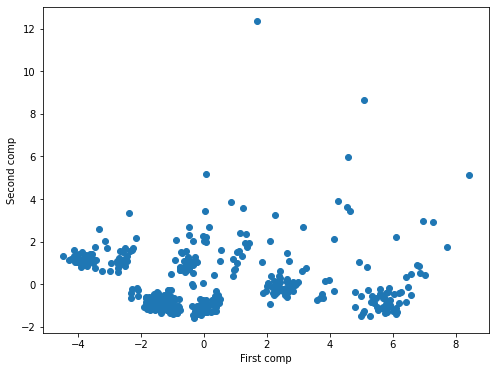

In [60]:
plt.figure(figsize= (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], cmap = 'plasma')
plt.xlabel('First comp')
plt.ylabel('Second comp')

In [61]:
df_comp= pd.DataFrame(pca.components_, columns = df.columns)

In [63]:
df_comp

,Open,High,Low,PrevClose,Ltp,Close,Wap,Wh52,Wl52,Volume,Notrades
0,0.353029,0.354216,0.352646,0.352688,0.353688,0.353727,0.353719,0.240486,-0.114792,0.146985,0.182217
1,-0.061438,-0.040242,-0.069106,-0.065118,-0.049807,-0.049231,-0.051701,-0.402310,-0.435919,0.580508,0.537722


<AxesSubplot:>

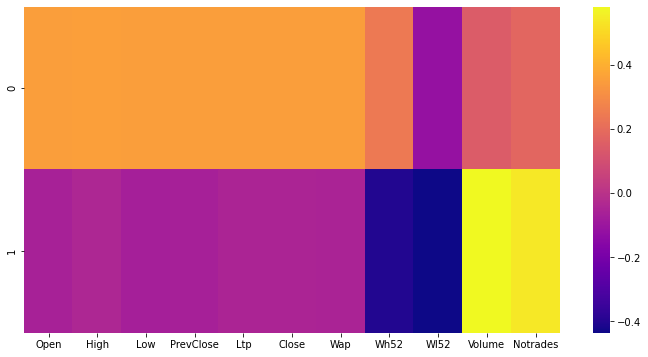

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap = 'plasma')